In [1]:
options(repr.plot.width=12, repr.plot.height=6, repr.plot.res = 150) # option for size of picture output  

# Spatialized Compatmental Models

## Loading required libraries

In [2]:
library('deSolve')
library('ggplot2')
library('tidyr')

## 2 patches movement

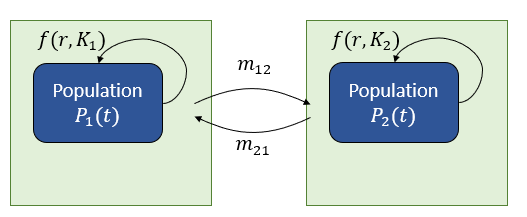

The equation is given by:

$$
\begin{cases}
\dfrac{dP_1}{dt} = r P_1  \left( 1 - \dfrac{P_1}{K_1} \right) - m_{12}P_1 + m_{21}P_2 \\[3mm]
\dfrac{dP_2}{dt} = r P_2  \left( 1 - \dfrac{P_2}{K_2} \right) - m_{21}P_2 + m_{12}P_1 
\end{cases}\,.
$$


In [3]:
patchy_ODE <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dP1 = r*P1*(1-P1/K1) - m12*P1 + m21*P2
        dP2 = r*P2*(1-P2/K2) - m21*P2 + m12*P1
        return(list(c(dP1, dP2)))
    })
}

In [4]:
Par <- c(r=0.5 , K1=100 , K2=200, m12=0.2, m21=0.4)
State <- c(P1=200, P2=1)
Time <- seq(0, 20, by = 0.01)
out <- as.data.frame(ode(func = patchy_ODE, y = State, parms = Par, times = Time))

In [5]:
head(out)

time P1       P2      
1 0.00 200.0000 1.000000
2 0.01 198.6165 1.399777
3 0.02 197.2578 1.797183
4 0.03 195.9232 2.192254
5 0.04 194.6121 2.585031
6 0.05 193.3240 2.975551

In [6]:
out_gg <- data.frame(
    time = rep(out$time, 2),
    variables = rep(c('Population 1','Population 2'), each=nrow(out)),
    values = c(out$P1, out$P2))

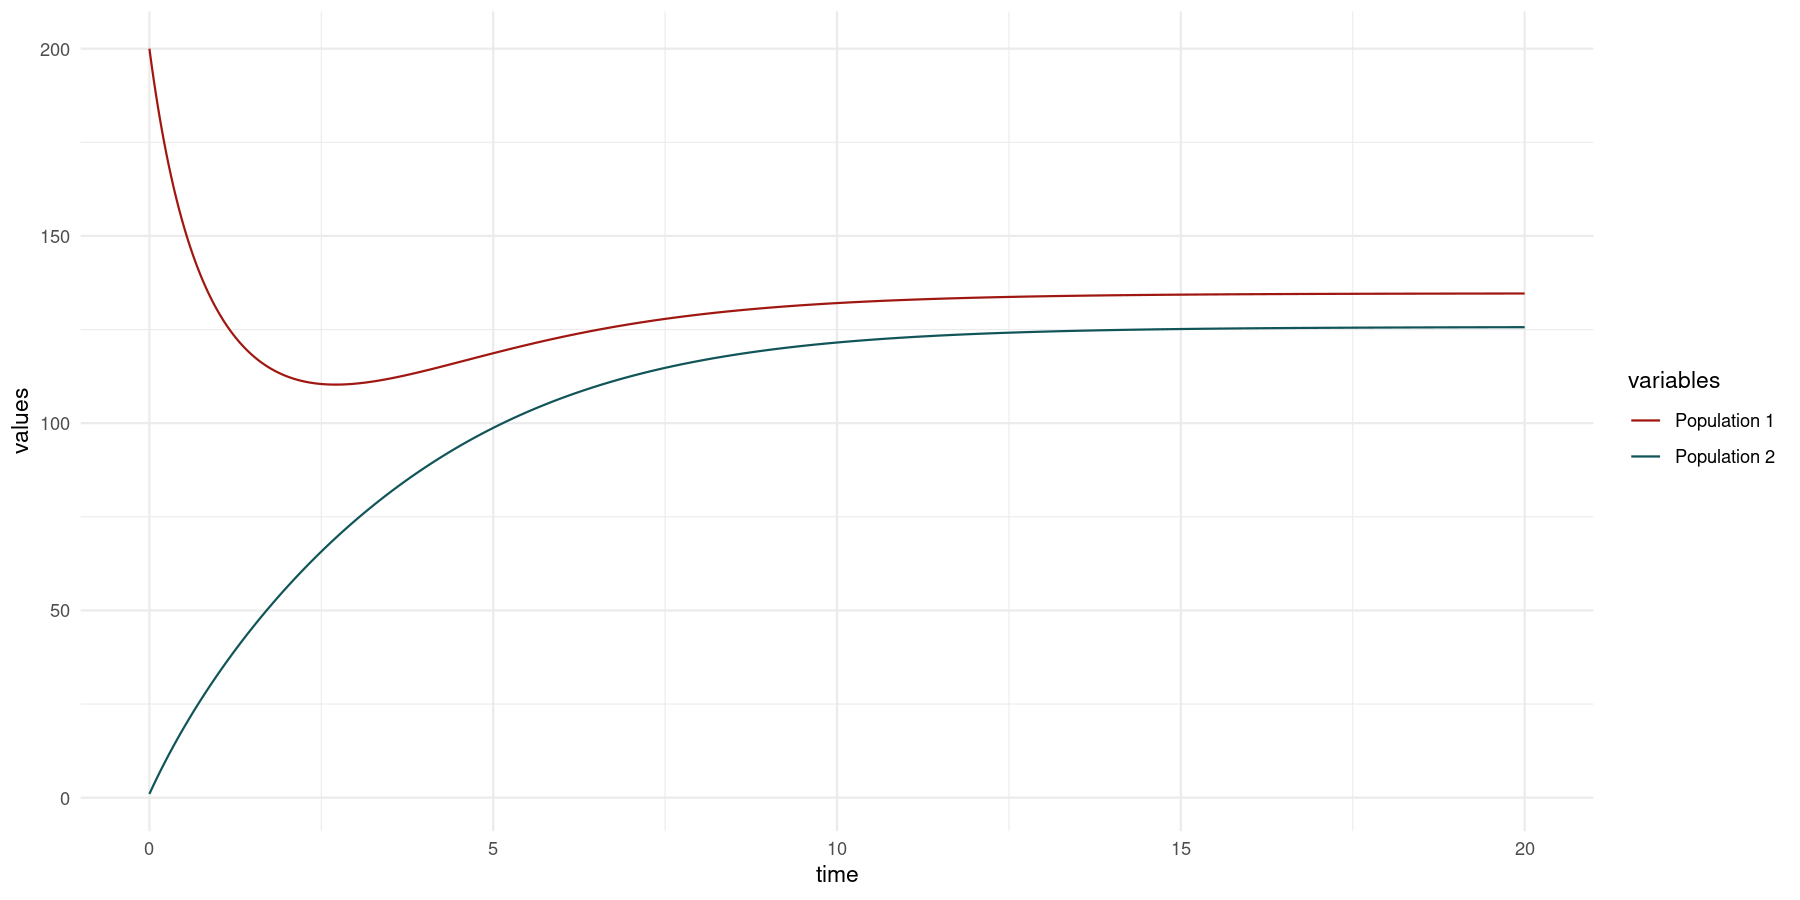

In [7]:
ggplot(data = out_gg) +
    theme_minimal() +
    scale_color_manual(values = c("#a01711", "#115558")) +
    geom_line(aes(x = time, y = values, color = variables))

### Exercises patchy movement

<span style="color:red;font-size:20px;">Questions?</span> 

* **Plot phase diagram**
* **How to take into account the size of patches?**
* **How to model a source/sink ratio?**

## Movement predator prey

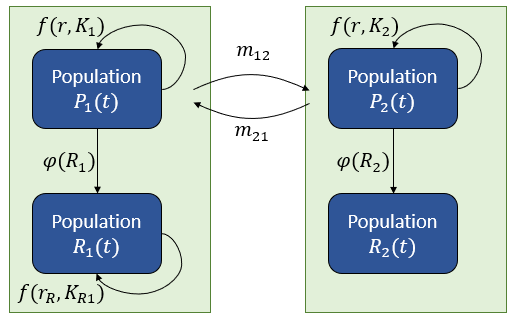

The equation is given by:

$$
\begin{cases}
\dfrac{dP_1}{dt} = r_P P_1  \left( 1 - \dfrac{P_1}{K_{P1}} \right) - m_{12}P_1 + m_{21}P_2 \\[3mm]
\dfrac{dP_2}{dt} = r_P P_2  \left( 1 - \dfrac{P_2}{K_{P2}} \right) - m_{21}P_2 + m_{12}P_1 \\[3mm]
\dfrac{dR_1}{dt} = r_R R_1  \left( 1 - \dfrac{R_1}{K_{R1}} \right) - aR_1 P_1 \\[3mm]
\dfrac{dR_2}{dt} = r_R R_2  \left( 1 - \dfrac{R_2}{K_{R2}} \right) - aR_2 P_2
\end{cases}\,.
$$

In [8]:
patchyPP_ODE <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dP1 = rP*P1*(1-P1/KP1) - m12*P1 + m21*P2
        dP2 = rP*P2*(1-P2/KP2) - m21*P2 + m12*P1
        dR1 = rR*R1*(1-R1/KR1) - a*R1*P1
        dR2 = rR*R2*(1-R2/KR2) - a*R2*P2
        return(list(c(dP1, dP2, dR1, dR2)))
    })
}

In [9]:
Par <- c(rP=0.5 , KP1=100 , KP2=200, m12=0.2, m21=0.4, rR=80, KR1=1000, KR2=2000, a=0.5)
State <- c(P1=200, P2=1, R1=1000, R2=2000)
Time <- seq(0, 20, by = 0.01)
out <- as.data.frame(ode(func = patchyPP_ODE, y = State, parms = Par, times = Time))

In [10]:
head(out)

time P1       P2       R1        R2      
1 0.00 200.0000 1.000000 1000.0000 2000.000
2 0.01 198.6166 1.399776  476.0349 1991.571
3 0.02 197.2578 1.797181  292.4120 1985.055
4 0.03 195.9232 2.192253  200.6538 1979.409
5 0.04 194.6121 2.585030  146.6469 1974.169
6 0.05 193.3240 2.975550  111.6966 1969.127

In [11]:
out_gg = out %>% 
    tidyr::pivot_longer(-time, names_to="population", values_to="density") %>%
    dplyr::mutate(popType = ifelse(substr(population,1,1) == 'P', 'Predator', 'Prey'))
    
head(out_gg)

time population density     popType 
1 0.00 P1          200.000000 Predator
2 0.00 P2            1.000000 Predator
3 0.00 R1         1000.000000 Prey    
4 0.00 R2         2000.000000 Prey    
5 0.01 P1          198.616563 Predator
6 0.01 P2            1.399776 Predator

In [12]:
ggplot(data = out_gg) +
    theme_minimal() +
    geom_line(aes(x = time, y = density, color = population)) + 
    facet_wrap(. ~ popType, scale='free')

### Exercises patchy predator-prey

<span style="color:red;font-size:20px;">Questions?</span> 

* **How to model different patch of prey and predator?**

## Ressource Driven Movement

How would you take into account that ressources ressources influence the movement of the predators ?

<span style="color:red;font-size:20px;">Questions?</span> 

* **Implement the RDM model**

## 2 patches  SIV

We reuse the Susceptible-Infected-Vaccinated model of the previous section.
In this model only the susceptible and vaccinated population is moving between patches.
The infection rate ($\beta_i$) and the vaccination rate ($\delta_i$) are different
between the two patches. The recovery rate ($\gamma$) si the same.

The objective of the model is to play we source-sink of infection.

$$
\begin{cases}
\dfrac{dS_1}{dt} = \gamma I_1 - \beta_2 S_1 I_1 - \delta S_1 - m_{12} S_1 + m_{21} S_2\\[3mm]
\dfrac{dI_1}{dt} = \beta S_1 I_1 - \gamma I_1  \\[3mm]
\dfrac{dV_1}{dt} = \delta_1 S_1 \\[3mm]
\\
\dfrac{dS_2}{dt} = \gamma I_2 - \beta_2 S_2 I_2 - \delta S_2  + m_{12} S_1 - m_{21} S_2\\[3mm]
\dfrac{dI_2}{dt} = \beta_2 S_2 I_2 - \gamma I_2 \\[3mm]
\dfrac{dV_2}{dt} = \delta_2 S_2
\end{cases}
$$

In [13]:
SIV_patchy <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        
        dS1 = gamma*I1 - beta1*I1*S1 - delta1*S1 - m12*S1 + m21*S2
        dI1 = beta1*I1*S1 - gamma*I1
        dV1 = delta1*S1
        dS2 = gamma*I2 - beta2*I2*S2 - delta2*S2 + m12*S1 - m21*S2
        dI2 = beta2*I2*S2 - gamma*I2
        dV2 = delta2*S2
        return(list(c(dS1, dI1, dV1, dS2, dI2, dV2)))
    })
}

In [14]:
Par <- c(
    gamma=0.5,                # recovery
    beta1=0.02, beta2=0.02,   # infection
    delta1=0.05, delta2=0.01, # vaccination 
    m12=0.2, m21=0.01         # migration
)
State <- c(S1=200, I1=1, V1=0, S2=50, I2=2, V2=1)
Time <- seq(0, 10, by = 0.01)
out <- as.data.frame(ode(func = SIV_patchy, y = State, parms = Par, times = Time))

In [15]:
df_SIV = data.frame(
    Time = rep(out$time, 6),
    Variables = rep(c('Susceptible','Infected', 'Vaccinated', 'Susceptible','Infected', 'Vaccinated'), each=nrow(out)),
    Population = c(rep("Pop_1", 3*nrow(out)),rep("Pop_2", 3*nrow(out))),
    Values = c(out$S1, out$I1, out$V1, out$S2, out$I2, out$V2))

In [16]:
ggplot(data = df_SIV) +
    theme_minimal() +
    geom_line(aes(x = Time, y = Values, color = Variables)) +
    facet_grid(~Population)

<span style="color:red;font-size:20px;">Questions?</span> 

* **Playing with the model you may be convinced that this very simple model exhuibit a complex behavior. How could we make it easier to understand?**

# Differential Equation with Events

In this last part, we play with event function that introduce exogeneous effect to ODEs system.

We wanted to introduce some temporal and spatial events. Because of the complexity, we choose to introduce only temporal event.


## The injection in blood

Let consider a pharmacokinetics model where a patient get an injection of a product in the blood every 20 days at a dose of 40 mg.

In [17]:
inject_events <- data.frame(
    var = "blood",
    time = 0:20,
    value = 40,
    method = "add")
head(inject_events)
plot(inject_events$time, inject_events$value, pch=16, cex=2, xlab = "days", ylab="injection")

var   time value method
1 blood 0    40    add   
2 blood 1    40    add   
3 blood 2    40    add   
4 blood 3    40    add   
5 blood 4    40    add   
6 blood 5    40    add

In [18]:
PK <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dblood <- - degrad_rate * blood
        return(list(c(dblood)))
    })
}

In [19]:
Time <- seq(from = 0, to = 10, by = 0.1)
State <- c(blood = 0)
Par <- c(degrad_rate=0.6)

outDrug <- ode(
    func = PK,
    y = State,
    times = Time,
    parms = Par,
    events = list(data = inject_events))

plot(outDrug)

## Harvesting

Here, we implement a trigger event. The food in a field is growing according to the following logisic differential eqaution:

$$
\dfrac{d F}{dt} = r F \left( 1- \dfrac{F}{K} \right)
$$

Then, the rule is as follow: 

* every time the food reach 80% of the carrying capacity, 50% is taken.


In [20]:
harvest <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dfood <- r * food * (1 - food / K)
        return(list(c(dfood)))
    })
}

In [21]:
Time <- seq(from = 0, to = 20, by = 0.1)
State <- c(food = 2)
Par <- c(r = 1, K = 10)

out_NO_harvest <- ode(func = harvest, y = State, times = Time, parms = Par)

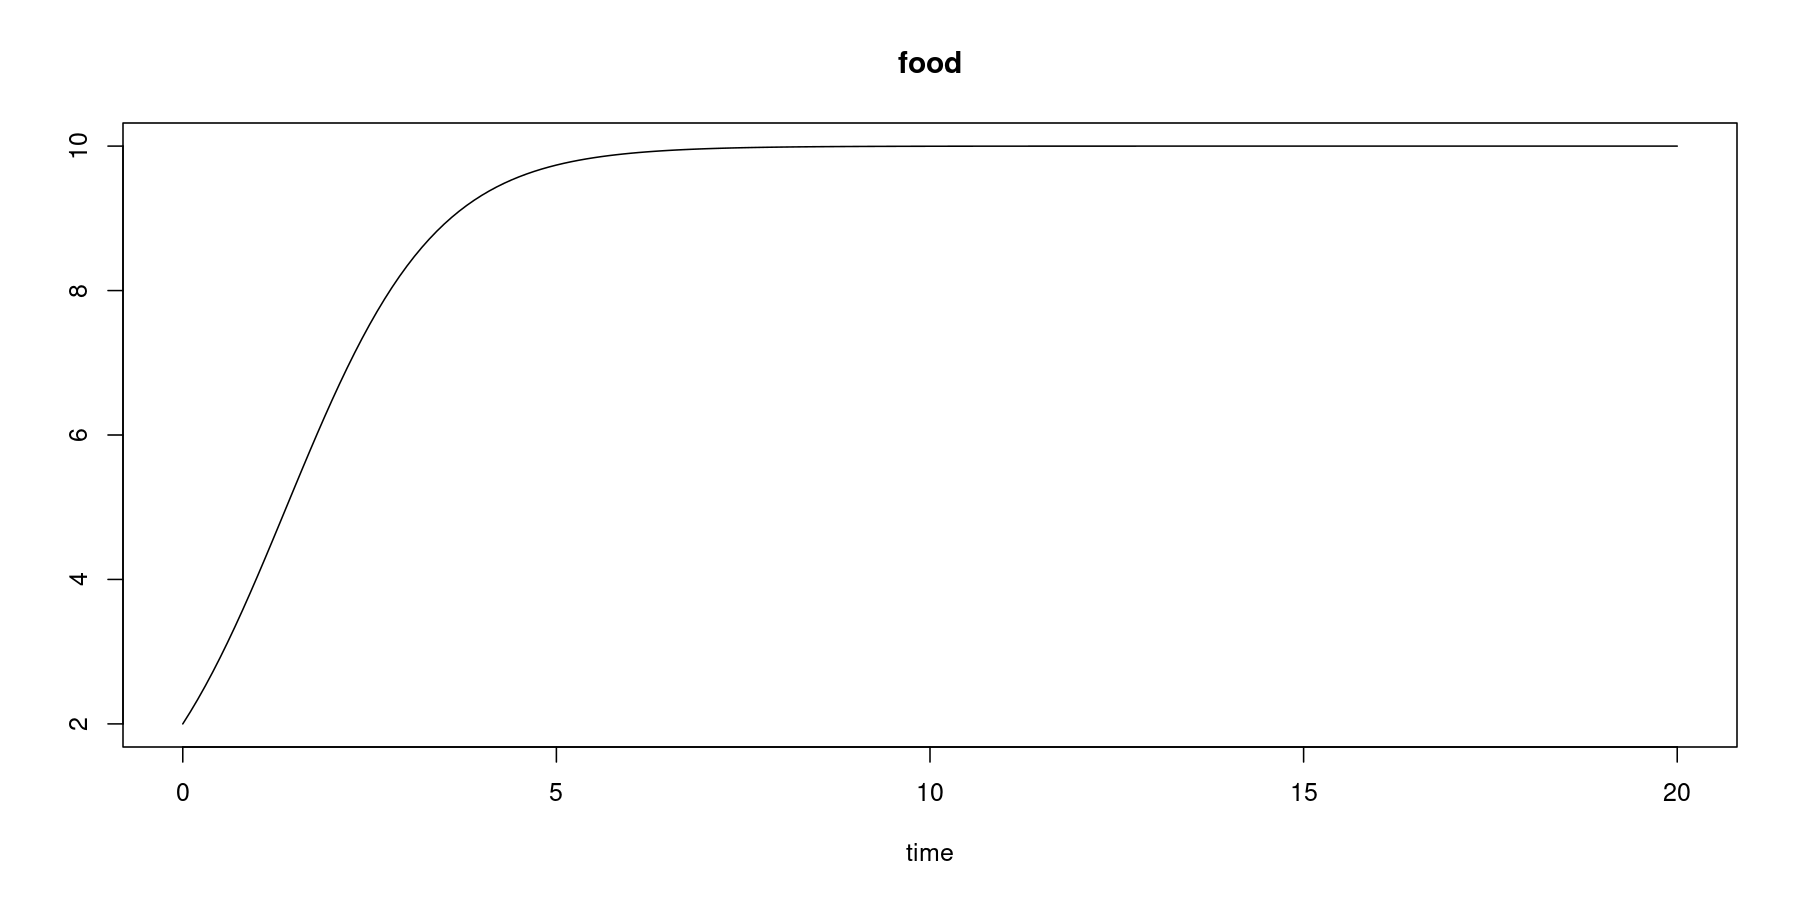

In [22]:
plot(out_NO_harvest)

#### trigger and effectrootfunc  <- function(t, y, p){ return(0.8*K - y)}
eventfunc <- function(t, y, p) {return(0.5*y)} functions:

* Trigger: Event is triggered by a root function. When the root function is 0, then the event happens
* Effect: the effect is return by an event function.

In [23]:
rootfunc  <- function(t, y, K){ return(0.8*K - y)}
eventfunc <- function(t, y, p) {return(0.5*y)}

In [24]:
out_harvest <- ode(
    func = harvest,
    y = State,
    times = Time, 
    parms = Par,
    rootfun = rootfunc,
    events = list(func = eventfunc, root = TRUE))

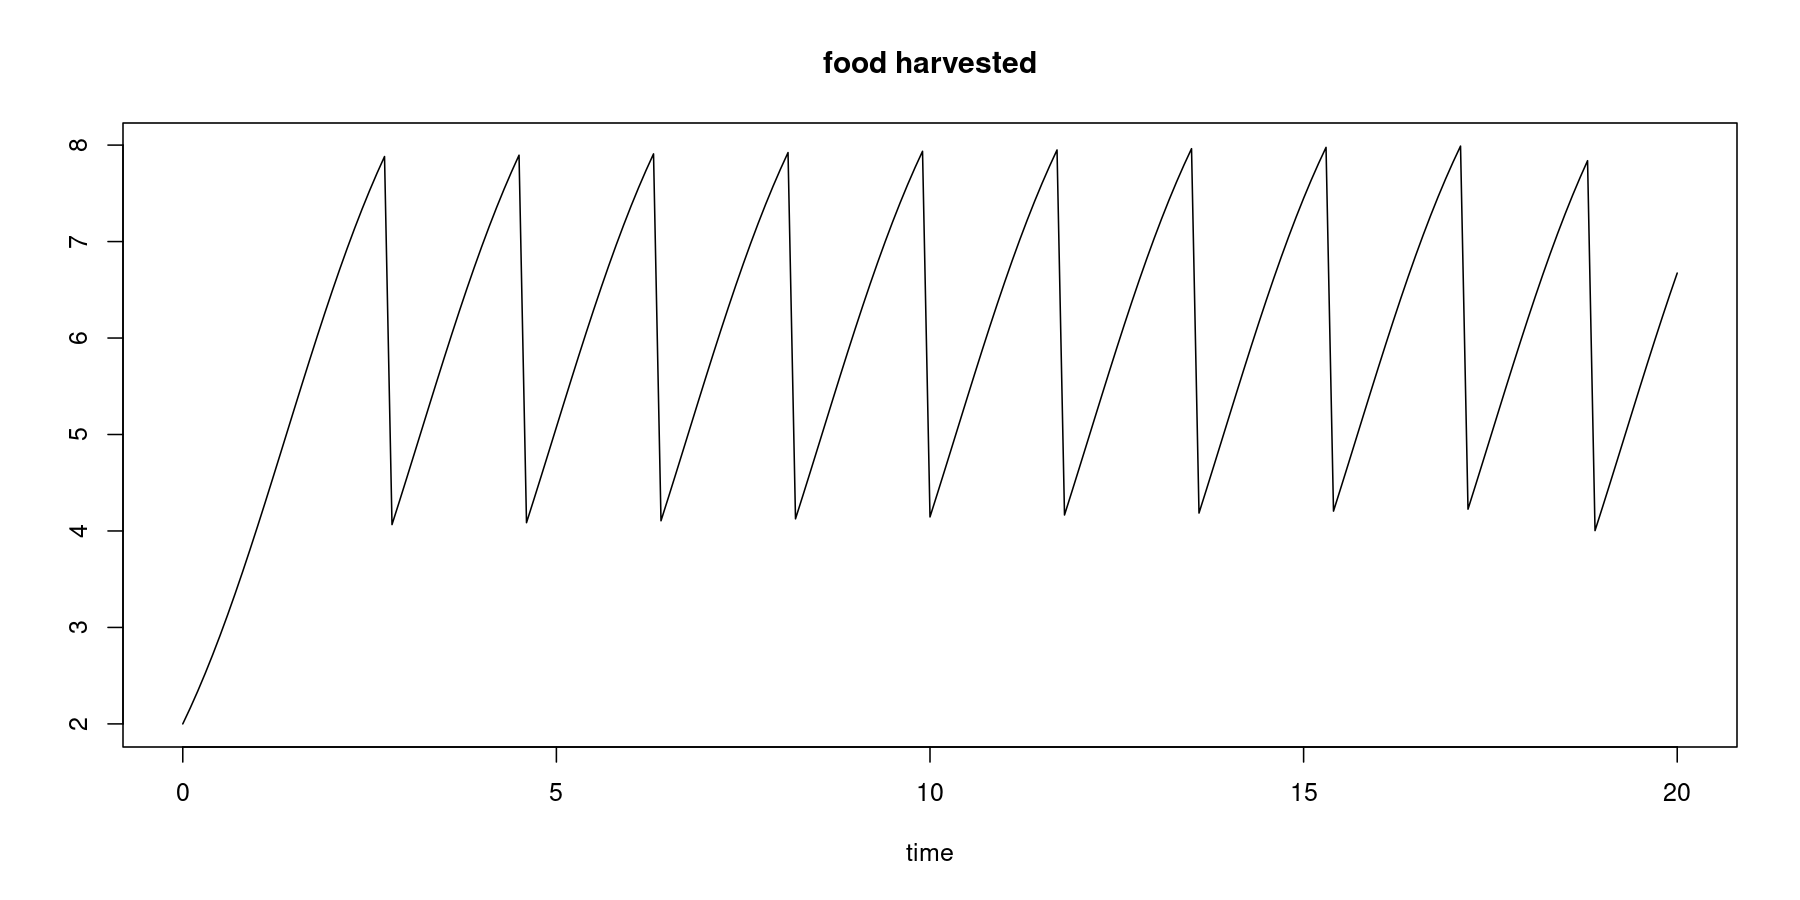

In [25]:
plot(out_harvest, main = "food harvested")

# A pinch of randomness

with consider some randomness in the equations.

* the growth rate `r` is never 100%, but between 0.8 and 0.9
* the harvest event is never 80%, but with a normal error of 0.02 standard error
* the event function (reduction of 50%) has an error of normal error 0.03 standard

In [26]:
harvest_rand <- function (Time, State, Par) {
    with(as.list(c(State, Par)), {
        dfood <- r * runif(1,min=0.7,max=0.9) * food * (1 - food / K)
        return(list(c(dfood)))
    })
}

rootfunc_rand  <- function(t, y, K){ return(0.8*rnorm(1,mean=0,sd=0.02)*K - y)}
eventfunc_rand <- function(t, y, p) {return(0.5*rnorm(1,mean=0,sd=0.03)*y)}

In [27]:
out_harvest_rand <- ode(
    func = harvest_rand,
    y = State,
    times = Time, 
    parms = Par,
    rootfun = rootfunc_rand,
    events = list(func = eventfunc, root = TRUE))

In [28]:
plot(out_harvest_rand)

We see here than adding random behavior does not lead to what we expect. Random is very hard to handle by solvers. And we need to use Stochastic Differential Equations.